# **CMSC 320 Final Project** 
## **Final Due Date: *Dec 09, 2025 @ 11:59 PM***
## **Group Members: Ricardo Vasquez, Justin Glazer, Jonathan Teagan, Colin Pollard**

## Checkpoint #2



**List of Imports**

In [17]:
import pandas as pd
from datetime import datetime
import string
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import sys



## Data Preprocessing

**Observations on the Titanic Dataset**

In [18]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")
rows_num, cols_num = titanic_df.shape
cols = titanic_df.columns.to_list()
col_types = titanic_df.dtypes.to_list()
info = titanic_df.count()
display(titanic_df.head(n=10), f"Rows: {rows_num}, Cols: {cols_num}", f"Column Names: {cols}", f"Column Types: {col_types}", info)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


'Rows: 891, Cols: 12'

"Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']"

"Column Types: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('O'), dtype('O')]"

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [19]:
unique_id = titanic_df['PassengerId'].is_unique
tot_unique_id = titanic_df['PassengerId'].nunique()
print("PassengerId's Unique?", unique_id, "Total Unique:",tot_unique_id, "out of", len(titanic_df))

null_count = titanic_df.isnull().sum()
duplicates = titanic_df.duplicated().sum()
print(null_count)
print("Duplicated:", duplicates)


string_cols = titanic_df.select_dtypes(include=['object']).columns
for col in string_cols:
    whitespace_count = titanic_df[col].str.strip().ne(titanic_df[col]).sum()
    if whitespace_count > 0:
        print(col, ":",whitespace_count, "entries with leading/trailing whitespace")



PassengerId's Unique? True Total Unique: 891 out of 891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Duplicated: 0
Name : 2 entries with leading/trailing whitespace
Cabin : 687 entries with leading/trailing whitespace
Embarked : 2 entries with leading/trailing whitespace


## Conclusion 1

Is Sex correlated with Survival?

HO: The sex of the passanger does not affect if they survived.

HA: The sex of the passanger does affect if they survived.

$\alpha = 0.05$.

Survived,0,1
Sex,,
female,81,233
male,468,109


P-Value: 1.1973570627755645e-58


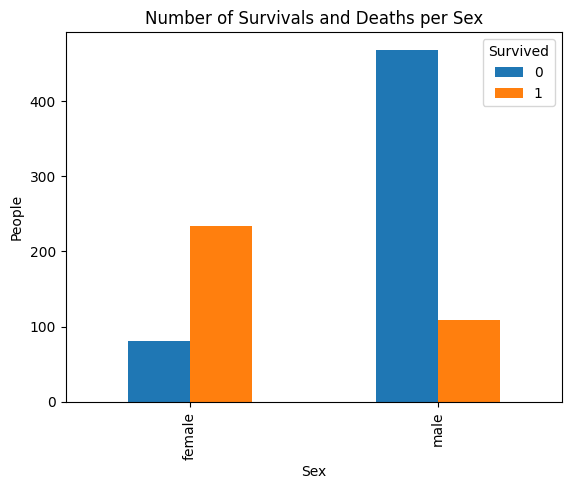

In [20]:
table = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
display(table)
result = chi2_contingency(table)
print(f"P-Value: {result.pvalue}")
table.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("People")
plt.title("Number of Survivals and Deaths per Sex")
plt.show()


With a P-Value of 1.1973570627755645e-58, this is clearly much less than the significance of 0.5. Thus, we reject the null hypothesis and find that it is statistically significant that there is a correlation between sex and survival. This is further shown by the graph above which demonstrates women survived at a much higher rate than men. One cause of this could be the rule of "Women and Children First," leading to many men being unable to make it on a lifeboat.